# Pași pentru rezolvare:
1. Construirea grafului Markov

2. Identificarea clicilor din model: intr-o retea Markov, o clica reprezinta un subset complet de noduri (unde toate nodurile sunt conectate între ele)

3. Determinarea probabilitatii comune: trebuie sa calculam distributia probabilitatii comune pentru toate cele 5 variabile discrete si sa gasim starile de probabilitate maxima

In [4]:
pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.5 MB/s eta 0:00:00


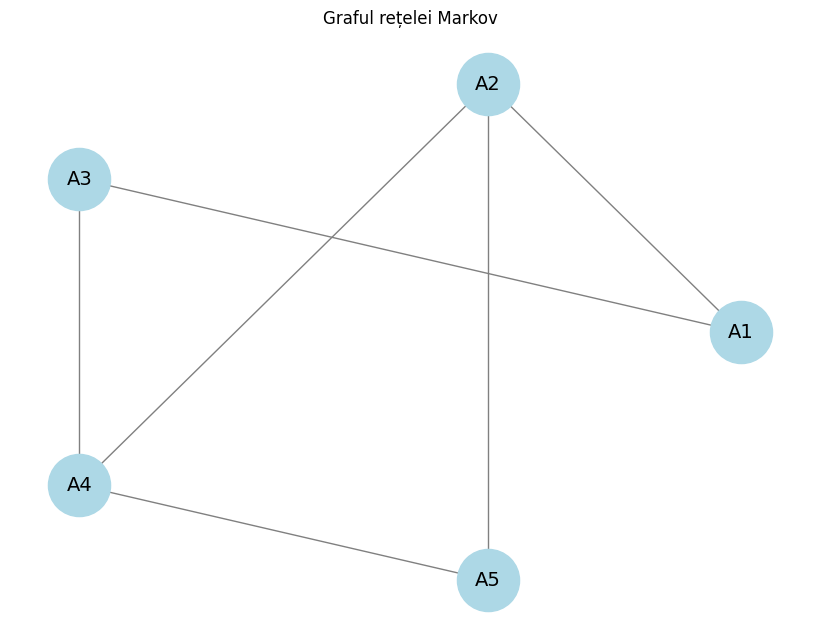

Cliques: [['A2', 'A5', 'A4'], ['A2', 'A1'], ['A3', 'A1'], ['A3', 'A4']]
    A1  A2  A3  A4  A5  Probabilitate
0    0   0   0   0   0            1.0
1    0   0   0   0   1            1.0
2    0   0   0   1   0            1.0
3    0   0   0   1   1            1.0
4    0   0   1   0   0            1.0
5    0   0   1   0   1            1.0
6    0   0   1   1   0            1.0
7    0   0   1   1   1            1.0
8    0   1   0   0   0            1.0
9    0   1   0   0   1            1.0
10   0   1   0   1   0            1.0
11   0   1   0   1   1            1.0
12   0   1   1   0   0            1.0
13   0   1   1   0   1            1.0
14   0   1   1   1   0            1.0
15   0   1   1   1   1            1.0
16   1   0   0   0   0            1.0
17   1   0   0   0   1            1.0
18   1   0   0   1   0            1.0
19   1   0   0   1   1            1.0
20   1   0   1   0   0            1.0
21   1   0   1   0   1            1.0
22   1   0   1   1   0            1.0
23   1   0   1  

In [11]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import VariableElimination
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd


# Creare model MarkovNetwork + adaugare muchii
model = MarkovNetwork()

edges = [('A1', 'A2'), ('A1', 'A3'), ('A2', 'A4'), ('A2', 'A5'), ('A3', 'A4'), ('A4', 'A5')]
model.add_edges_from(edges)

# Vizualizarea grafului
plt.figure(figsize=(8, 6))
pos = nx.kamada_kawai_layout(model)
nx.draw(model, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=14, edge_color='gray')
plt.title("Graful rețelei Markov")
plt.show()

# Crearea grafului networkx manual din modelul Markov + determinare clici
G = nx.Graph()
G.add_edges_from(model.edges())
cliques = list(nx.find_cliques(G))
print(f"Cliques: {cliques}")

# Definirea factorilor pentru fiecare clica in functie de energia data
phi_A1A2 = DiscreteFactor(['A1', 'A2'], [2, 2], [1, 1, 1, 1])
phi_A1A3 = DiscreteFactor(['A1', 'A3'], [2, 2], [1, 1, 1, 1])
phi_A2A4 = DiscreteFactor(['A2', 'A4'], [2, 2], [1, 1, 1, 1])
phi_A2A4 = DiscreteFactor(['A2', 'A5'], [2, 2], [1, 1, 1, 1])
phi_A3A4 = DiscreteFactor(['A3', 'A4'], [2, 2], [1, 1, 1, 1])
phi_A4A5 = DiscreteFactor(['A4', 'A5'], [2, 2], [1, 1, 1, 1])
model.add_factors(phi_A1A2, phi_A1A3, phi_A2A4, phi_A3A4, phi_A4A5)

# Determinarea probabilitatilor comune prin inferenta
infer = VariableElimination(model)
joint_prob = infer.query(variables=['A1', 'A2', 'A3', 'A4', 'A5'])

# Creare tabel din valorile factorului
variables = joint_prob.variables
cardinality = joint_prob.cardinality
values = joint_prob.values

# Afisare tabel cu probabilitatile
configurations = pd.MultiIndex.from_product([[0, 1]] * len(variables), names=variables)
joint_prob_table = pd.DataFrame({'Probabilitate': values.flatten()}, index=configurations).reset_index()
print(joint_prob_table)